In [13]:
import import_ipynb
import preprocess_model
import numpy as np
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, StandardScaler, OneHotEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate, Dropout, SimpleRNN, Dense, Concatenate
from tensorflow.keras.optimizers import Adam
from keras.layers import LSTM, Reshape


# Get data from preprocess_model


In [14]:
df = preprocess_model.df_rnn

# X_col = preprocess_model.X_col
# Country = preprocess_model.Country
# y_target = preprocess_model.y_target

# X_encoded = preprocess_model.X_encoded

# X_scaled = preprocess_model.X_scaled


# X = np.concatenate((X_encoded, X_scaled), axis=1)
# y = df[y_target]

X_train, X_val_test, y_train, y_val_test = preprocess_model.X_train_RNN, preprocess_model.X_val_test, preprocess_model.y_train_RNN, preprocess_model.y_val_test
X_val, X_test, y_val, y_test = preprocess_model.X_val_RNN, preprocess_model.X_test_RNN, preprocess_model.y_val_RNN, preprocess_model.y_test_RNN

X_col_train, X_num_train = preprocess_model.X_col_train, preprocess_model.X_num_train
X_col_val, X_num_val = preprocess_model.X_col_val, preprocess_model.X_num_val,
X_col_test, X_num_test = preprocess_model.X_col_test, preprocess_model.X_num_test


# Define model architecture

Epoch 1/200
15/15 [==============================] - 4s 51ms/step - loss: 9494.8877 - val_loss: 9235.5586
Epoch 2/200
15/15 [==============================] - 0s 22ms/step - loss: 6580.4351 - val_loss: 7948.7603
Epoch 3/200
15/15 [==============================] - 0s 24ms/step - loss: 8454.6914 - val_loss: 8579.8203
Epoch 4/200
15/15 [==============================] - 0s 27ms/step - loss: 8173.1934 - val_loss: 7127.6567
Epoch 5/200
15/15 [==============================] - 0s 22ms/step - loss: 3545.9604 - val_loss: 422.3024
Epoch 6/200
15/15 [==============================] - 0s 20ms/step - loss: 925.4235 - val_loss: 262.4897
Epoch 7/200
15/15 [==============================] - 0s 22ms/step - loss: 292.6642 - val_loss: 249.3821
Epoch 8/200
15/15 [==============================] - 0s 27ms/step - loss: 131.8745 - val_loss: 81.1134
Epoch 9/200
15/15 [==============================] - 0s 23ms/step - loss: 76.4812 - val_loss: 62.8312
Epoch 10/200
15/15 [==============================] - 0s 2

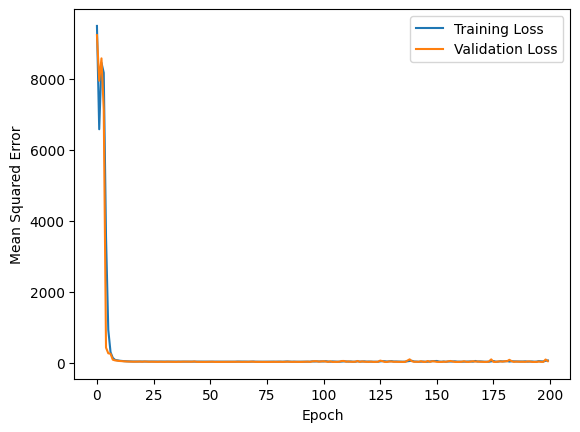

In [15]:
num_input = Input(shape=(X_num_train.shape[1], X_num_train.shape[2]))
rnn_layer = SimpleRNN(64, activation='relu')(num_input)

cat_input = Input(shape=(X_col_train.shape[1],))
cat_output = Dense(64, activation='relu')(cat_input)

concatenated = Concatenate()([rnn_layer, cat_output])
output = Dense(1)(concatenated)

model = Model(inputs=[num_input, cat_input], outputs=output)
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit([X_num_train, X_col_train], y_train, epochs=200, batch_size=64,
                    validation_data=([X_num_val, X_col_val], y_val), verbose=1)

# Evaluate the model on the test set
test_loss = model.evaluate([X_num_test, X_col_test], y_test)


# Plot the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [16]:
# Make predictions on the test set
predictions = model.predict([X_num_test, X_col_test])
print(predictions)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)


print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')


7/7 [==============================] - 0s 9ms/step
[[94.39568 ]
 [93.01972 ]
 [93.198944]
 [92.99621 ]
 [89.50553 ]
 [92.917404]
 [93.17759 ]
 [94.39359 ]
 [93.433525]
 [93.32876 ]
 [93.30062 ]
 [93.12622 ]
 [94.09944 ]
 [93.588745]
 [93.27222 ]
 [89.301   ]
 [94.33841 ]
 [89.24803 ]
 [93.067665]
 [93.46061 ]
 [93.08963 ]
 [93.29371 ]
 [93.20042 ]
 [92.87386 ]
 [93.11437 ]
 [93.06116 ]
 [93.05865 ]
 [94.283775]
 [93.08869 ]
 [92.81255 ]
 [93.539185]
 [93.432655]
 [93.37991 ]
 [93.26513 ]
 [92.336586]
 [93.251366]
 [93.008705]
 [93.29238 ]
 [93.20077 ]
 [93.46804 ]
 [92.93148 ]
 [93.13718 ]
 [92.964966]
 [93.3834  ]
 [93.25547 ]
 [93.30019 ]
 [94.4824  ]
 [93.14394 ]
 [94.320244]
 [92.059715]
 [93.01911 ]
 [92.96545 ]
 [93.071556]
 [93.17778 ]
 [91.901474]
 [93.23769 ]
 [93.404015]
 [93.49474 ]
 [94.13308 ]
 [93.318184]
 [93.2645  ]
 [93.287704]
 [92.74248 ]
 [94.26941 ]
 [93.194244]
 [93.48496 ]
 [93.108925]
 [92.986984]
 [93.18976 ]
 [93.12826 ]
 [93.40453 ]
 [93.09171 ]
 [91.57882 ]
